<a href="https://colab.research.google.com/github/irolabs/rockpaperscissor/blob/main/Rock_Paper_Scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-13 04:46:23--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.54MB/s    in 50s     

2020-07-13 04:47:14 (6.17 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile,os

In [ ]:
#melakukan extract pada file zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['paper', 'rock', 'README_rpc-cv-images.txt', 'scissors', 'rps-cv-images']

In [ ]:
#menghapus file yang tidak dibutuhkan
!rm -rf /tmp/rockpaperscissors/README_rpc-cv-images.txt
!rm -rf /tmp/rockpaperscissors/rps-cv-images

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['paper', 'rock', 'scissors']

In [ ]:
data_path = '/tmp/rockpaperscissors'
file_name=[]
tag=[]
full_path=[]

for path, subdirs, files in os.walk(data_path):
  for name in files:
    full_path.append(os.path.join(path,name))
    tag.append(path.split('/')[-1])
    file_name.append(name)

In [ ]:
import pandas as pd

In [ ]:
#inisialisasi data frame
df = pd.DataFrame({'path':full_path,'file_name':file_name,'tag':tag})
df.groupby(['tag']).size()

tag
paper       712
rock        726
scissors    750
dtype: int64

In [ ]:
df.head()

,path,file_name,tag
0,/tmp/rockpaperscissors/paper/9zuFLFklb0ibEelE.png,9zuFLFklb0ibEelE.png,paper
1,/tmp/rockpaperscissors/paper/9hKJu3ZMso4Qbtfh.png,9hKJu3ZMso4Qbtfh.png,paper
2,/tmp/rockpaperscissors/paper/lb8kepfzcnutbQI1.png,lb8kepfzcnutbQI1.png,paper
3,/tmp/rockpaperscissors/paper/LAhqdrhPNg3ZLxpr.png,LAhqdrhPNg3ZLxpr.png,paper
4,/tmp/rockpaperscissors/paper/RlpqfQnTgM6AxUNs.png,RlpqfQnTgM6AxUNs.png,paper


In [ ]:
x=df['path']
y=df['tag']

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(
    x,y,test_size=0.2,random_state=300
)

In [ ]:
df_train = pd.DataFrame({
    'path':x_train,
    'tag':y_train,
    'set': 'train'
})

df_validation = pd.DataFrame({
    'path': x_val,
    'tag': y_val,
    'set': 'validation'
})

In [ ]:
print('data training', len(df_train))
print('data validation', len(df_validation))

data training 1750
data validation 438


In [ ]:
import shutil 
from tqdm.notebook import tqdm as tq

In [ ]:
#membuat variabel baru untuk menyimpan dataset
datasource_path = '/tmp/rockpaperscissors/'
dataset_path = '/tmp/rockpaperscissors/dataset'
df_all = df_train.append([df_validation]).reset_index(drop=1)

In [ ]:
for index, row in tq(df_all.iterrows()):
    
    #detect filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    #make folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    #define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    #copy file from source to dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

In [ ]:
os.listdir('/tmp/rockpaperscissors/dataset')

['train', 'validation']

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

In [ ]:
train_generator= train_datagen.flow_from_directory(
    '/tmp/rockpaperscissors/dataset/train',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

val_generator= val_datagen.flow_from_directory(
    '/tmp/rockpaperscissors/dataset/validation',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 1750 images belonging to 3 classes.
Found 438 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer= tf.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data= val_generator,
    validation_steps=5,
    verbose=2
)

Epoch 1/20
25/25 - 43s - loss: 1.0680 - accuracy: 0.4443 - val_loss: 0.9609 - val_accuracy: 0.5562
Epoch 2/20
25/25 - 43s - loss: 0.8753 - accuracy: 0.5975 - val_loss: 0.6884 - val_accuracy: 0.7375
Epoch 3/20
25/25 - 43s - loss: 0.5726 - accuracy: 0.7823 - val_loss: 0.3266 - val_accuracy: 0.8687
Epoch 4/20
25/25 - 43s - loss: 0.3063 - accuracy: 0.8873 - val_loss: 0.2020 - val_accuracy: 0.9375
Epoch 5/20
25/25 - 43s - loss: 0.2622 - accuracy: 0.9114 - val_loss: 0.1888 - val_accuracy: 0.9250
Epoch 6/20
25/25 - 43s - loss: 0.1924 - accuracy: 0.9405 - val_loss: 0.1310 - val_accuracy: 0.9500
Epoch 7/20
25/25 - 43s - loss: 0.1799 - accuracy: 0.9438 - val_loss: 0.0948 - val_accuracy: 0.9688
Epoch 8/20
25/25 - 43s - loss: 0.1673 - accuracy: 0.9443 - val_loss: 0.3864 - val_accuracy: 0.8375
Epoch 9/20
25/25 - 43s - loss: 0.1575 - accuracy: 0.9525 - val_loss: 0.1967 - val_accuracy: 0.9250
Epoch 10/20
25/25 - 43s - loss: 0.1368 - accuracy: 0.9575 - val_loss: 0.0764 - val_accuracy: 0.9750
Epoch 11/

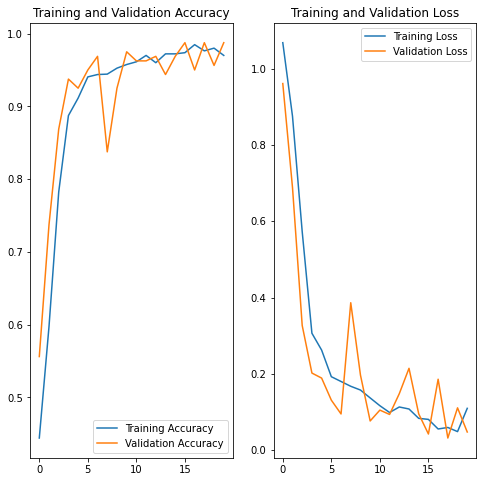

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving 1mnAKQCHEDbtjPX2.png to 1mnAKQCHEDbtjPX2.png
1mnAKQCHEDbtjPX2.png
rock


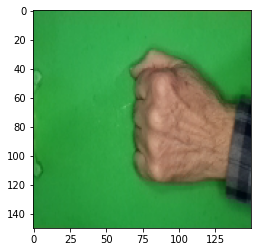

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')